# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

# Loading The Data

In [2]:
# loading data
data=pd.read_csv('Advertising.csv',)

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
# Checked for null values and found there are no null values.
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
#Statistical Info 
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# All features are numeric variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# VISUALIZATION

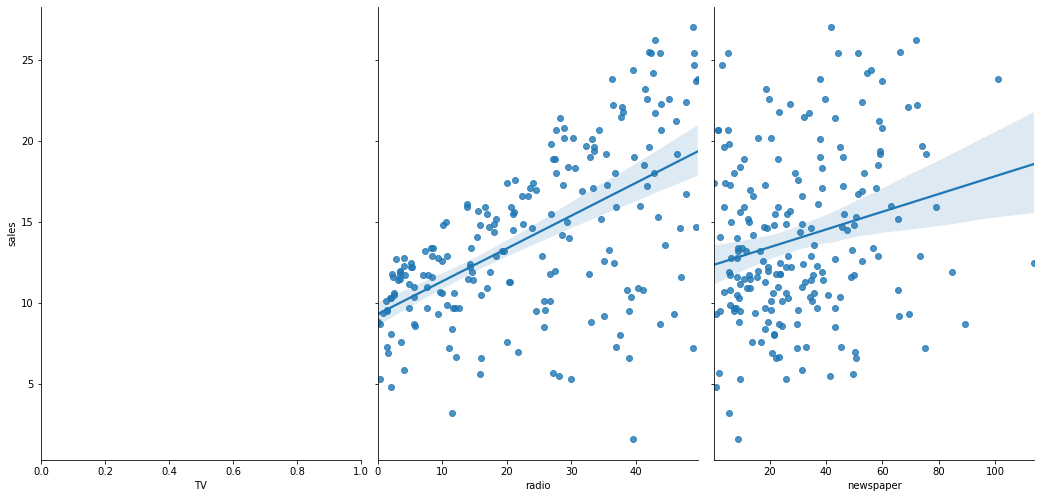

In [8]:
# Bivariate Analysis of each feature vs Target variable.
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7,kind='reg')

Observations: Advertisements through TV is having positive correlation with sales.
    
Radio is slightly positively related, However newspaper is giving a distorted pattern.

<AxesSubplot:>

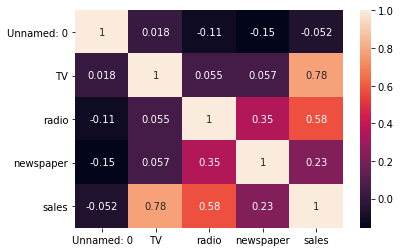

In [9]:
sns.heatmap(data.corr(), annot=True)

TV is having positive correlation higher than all other channels.

# Correlation

In [10]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Modelling- Linear Regression

In [11]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
x=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 2)
(80, 3)
(80, 2)


In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5135684546016295

In [13]:
#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 
print("linear regression bias or intercept   => ",lr.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lr.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [18.37840315  3.3099108 ]
linear regression coefficient         =>  [[-0.04171438  0.02697285  0.49154367]
 [-0.00203532  0.04396169  0.18435846]]
feature columns                       =>  Index(['Unnamed: 0', 'TV', 'radio'], dtype='object')


In [14]:
y_hat = lr.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

# the less score is the better

15.316966455487268


In [15]:
# Root Mean Square error wth TV ,Newspaper and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6990372583307154

# Using Cross Validation To Check Best Features

In [16]:
scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051797


# Tv Is The Best Method Of Advertising